In [33]:
import os, sys
#Basic Data Statics
raw_file = open("/data/opinion_spam/real/reviewsNew.txt")
raw_data_count = 0
whole_body_text =''
for line in raw_file:
    raw_data_count = raw_data_count+1
  
    item = line.split("\t")
    if len(item) == 8:
        whole_body_text = (whole_body_text + item[7])

raw_file.close()
print 'Raw File Count is : ' + str(raw_data_count)
print 'whole body length : ' + str(len(whole_body_text))

Raw File Count is : 5838922
whole body length : 5350953576


In [ ]:
#Filter useless reviews


In [1]:
#Test 10lines into DF
raw_file = open("/data/opinion_spam/real/10lines")
line = raw_file.readline()
data_count = 0
datas = []
while line:
    data_count = data_count+1
    line = raw_file.readline()
    item = line.split('\t')
    print 'sub length : '+ str(len(item))
    if len(item) == 8:
        datas.append(item)
raw_file.close()
print 'data count is :' + str(data_count)
print datas
print len(datas)


sub length : 8
sub length : 8
sub length : 8
sub length : 8
sub length : 8
sub length : 8
sub length : 8
sub length : 8
sub length : 8
sub length : 1
data count is :10
[['A1004AX2J2HXGL', 'B00028HBKM', 'January 17, 2005', '9', '22', '1.0', '"Life beyond the thunderdome"', ' I cried when I saw The PASSION OF THE CHRIST - how could you not? I sat there and watched a man brutalized for two hours. Everyone around me was crying - it felt like we were all tuned in to the proceedings of a televised execution.  I was a little confused by the time it was all over & as I was leaving the theater, I was even more so: I saw parents walking out with their children.  Jesus Christ\'s teachings were left in the wings, the significance of his life locked out of the script almost entirely.  Hardly a first impression for young children.  The ONLY things I found at all interesting about the PASSION OF THE CHRIST: the use of the authentic languages from the time period (Latin & Aramaic) and the actors bring

In [2]:
#Transfer data into dataframe
import pandas as pd
col_names = ['rid', 'pid', 'date', 'hfd', 'fd', 'ratings', 'title', 'body']

df = pd.DataFrame(data = datas, columns = col_names)
#Relocate the data type
df[['hfd', 'fd','ratings']] = df[['hfd', 'fd', 'ratings']].astype(float)
print df.dtypes
df

rid         object
pid         object
date        object
hfd        float64
fd         float64
ratings    float64
title       object
body        object
dtype: object


,rid,pid,date,hfd,fd,ratings,title,body
0,A1004AX2J2HXGL,B00028HBKM,"January 17, 2005",9,22,1,"""Life beyond the thunderdome""",I cried when I saw The PASSION OF THE CHRIST ...
1,A1004AX2J2HXGL,B00062IVM6,"January 17, 2005",4,7,5,I'm making my lunch!,WILD AT HEART on DVD. I've been waiting on t...
2,A1004AX2J2HXGL,B00064LJVE,"January 13, 2005",5,15,1,Into the woods,"M. is a hack, a second-place magician in a hi..."
3,A1004AX2J2HXGL,B0002GMSC0,"January 6, 2005",15,15,1,koo-koo-ca-choo,Where do people come up with this garbage? ...
4,A1004AX2J2HXGL,B00019RD1Y,"December 20, 2004",1,1,5,Exceptional music that can stand alone as bril...,"A wonderful, wonderful collection of music. ..."
5,A1004AX2J2HXGL,B00003CXHM,"April 9, 2004",1,1,4,"""drunken prophecies, libels and dreams""",Wow. The Sex Pistols? Never heard a more pe...
6,A1004AX2J2HXGL,B000059H9C,"January 25, 2004",3,3,5,roasted pigs in space!,FELLINI SATYRICON - the first film I experien...
7,A1004AX2J2HXGL,B00000153R,"December 21, 2003",3,3,5,nervous man with a four dollar CD,I recently bought this CD brand new. I knew ...
8,A1004AX2J2HXGL,B00003CXE7,"December 19, 2003",5,25,1,Meditations?,This movie was lots of fun. The story was so ...


the maxValue of ratings is :5.0
['the most popular nameB00062IVM6' 'the most popular nameB00019RD1Y'
 'the most popular nameB000059H9C' 'the most popular nameB00000153R']


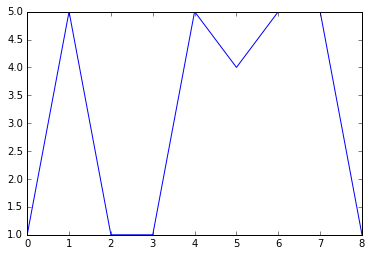

In [3]:
#State the hfd/fd and ratings
#ratings
%matplotlib inline
import matplotlib.pyplot as plt

df['ratings'].plot()

maxValue = df.ratings.max()
print 'the maxValue of ratings is :' + str(maxValue)
maxName = df['pid'][df['ratings'] == df['ratings'].max()].values
Text = str(maxValue) + ' - ' + maxName
#plt.annotate(Text, xy=(1, maxValue), xytext=(1,0), xycoords=('ax', 'data'), textcoords='aaa')
print 'the most popular name' + maxName



1.0 4
4.0 1
5.0 4
[1.0, 1.0, 1.0, 1.0, 4.0, 5.0, 5.0, 5.0, 5.0]
height:4


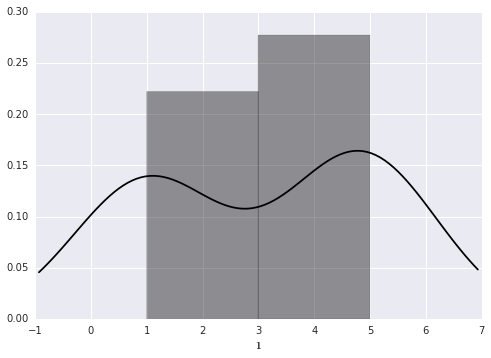

In [78]:
ratings_gb = df.groupby('ratings')
rg = ratings_gb.groups
ratings4plot = []
height = 0
for (k,v) in rg.items():
    print k, len(v)
    if height < len(v):
        height = len(v)
    for x in range(len(v)):
        ratings4plot.append(k)
print ratings4plot
print 'height:'+ str(height)
import seaborn as sns

sns.distplot(ratings4plot, kde=True, color='black', axlabel='1')

In [4]:
import matplotlib
print 'matplotlib.get_backend(): ' + matplotlib.get_backend()

plt.show()

matplotlib.get_backend(): module://ipykernel.pylab.backend_inline


In [15]:
#show the hfd/fd distribution

#add new column to df
df['hfd/fd'] = (df['hfd']/df['fd']).astype(float)
df
new_df = df[df["fd"] > 10]
new_df



,rid,pid,date,hfd,fd,ratings,title,body,hfd/fd
0,A1004AX2J2HXGL,B00028HBKM,"January 17, 2005",9,22,1,"""Life beyond the thunderdome""",I cried when I saw The PASSION OF THE CHRIST ...,0.409091
2,A1004AX2J2HXGL,B00064LJVE,"January 13, 2005",5,15,1,Into the woods,"M. is a hack, a second-place magician in a hi...",0.333333
3,A1004AX2J2HXGL,B0002GMSC0,"January 6, 2005",15,15,1,koo-koo-ca-choo,Where do people come up with this garbage? ...,1.000000
8,A1004AX2J2HXGL,B00003CXE7,"December 19, 2003",5,25,1,Meditations?,This movie was lots of fun. The story was so ...,0.200000


In [17]:
#Transfer into label with body

tdf = df[['hfd/fd', 'body']]
print tdf.dtypes
tdf

hfd/fd    float64
body       object
dtype: object


,hfd/fd,body
0,0.409091,I cried when I saw The PASSION OF THE CHRIST ...
1,0.571429,WILD AT HEART on DVD. I've been waiting on t...
2,0.333333,"M. is a hack, a second-place magician in a hi..."
3,1.000000,Where do people come up with this garbage? ...
4,1.000000,"A wonderful, wonderful collection of music. ..."
5,1.000000,Wow. The Sex Pistols? Never heard a more pe...
6,1.000000,FELLINI SATYRICON - the first film I experien...
7,1.000000,I recently bought this CD brand new. I knew ...
8,0.200000,This movie was lots of fun. The story was so ...


In [31]:
#Fit TFIDF model
import nltk
#去掉标点符号
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered.append(token)
    stems = []
    for t in filtered:
        tt = stemmer.stem(t)
        if tt not in stems:
            stems.append(tt)
    return stems

test_str = 'I haved two dreams.'
print type(test_str)


tokenize_and_stem(test_str)




<type 'str'>


LookupError: 
**********************************************************************
  Resource u'tokenizers/punkt/english.pickle' not found.  Please
  use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - '/home/work/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - u''
**********************************************************************

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.98, max_features=200000,
                        min_df=0.06, stop_words='english',
                        use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1, 3))

tfidf_mat = tfidf.fit_transform(whole_body_text)

print tfidf_mat.shape